# Instruction

In this part of the assigment, you will prepare the data to analyze the "meaningful votes" for the European Union Withdrawal Agreement and carry out a classification task. 

There were three attempts to pass a version of withdrawal agreement (formed late 2018) in the House of Commons, but in all three attempts the government led by Prime Minister Theresa May failed to pass. The failures were due to the large number of rebels among Conservative MPs. 

If you are not familiar with the story about it you can rely on the following sources:

- Aidt, T., Grey, F. & Savu, A. The Meaningful Votes: Voting on Brexit in the British House of Commons. *Public Choice* (2019).
  - https://link.springer.com/article/10.1007/s11127-019-00762-9
  - An academic article to analyze the situation
  - The analysis is similar to what you will do
- Wikipedia:
  - https://en.wikipedia.org/wiki/Parliamentary_votes_on_Brexit


## Your task

1. Download the voting records in JSON. Parse it
2. Get other datasets and merge them with the voting records
3. Complete a machine learning task to predict rebels among Conservative MPs

There are three meaningful votes (see the links above) and url to get API access to each of them are as follows:

- Vote1: https://commonsvotes-api.parliament.uk/data/division/664.json
- Vote2: https://commonsvotes-api.parliament.uk/data/division/623.json
- Vote3: https://commonsvotes-api.parliament.uk/data/division/562.json

You can select one of them (or use all of them if you think it fits to the discussion you make in the later sections)


In [ ]:
import numpy as np
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style(style = 'whitegrid')
%matplotlib inline

# Get JSON file(s) and construct a dataframe (10 percent)

- Parse the JSON file, and understand the structure of the JSON 
- HINT: In UK parliament, Yes votes are "Ayes" and No votes are "Noes"


In [ ]:
vote1_url = "https://commonsvotes-api.parliament.uk/data/division/664.json"

In [ ]:
response1 = urlopen(vote1_url)
dic_nat = json.load(response1)
print(json.dumps(dic_nat, indent = 4))

{
    "DivisionId": 664,
    "Date": "2019-03-29T14:26:00",
    "PublicationUpdated": "2019-03-29T14:48:03",
    "Number": 395,
    "IsDeferred": false,
    "EVELType": "",
    "EVELCountry": "",
    "Title": "United Kingdom's withdrawal from the European Union",
    "AyeCount": 286,
    "NoCount": 344,
    "DoubleMajorityAyeCount": null,
    "DoubleMajorityNoCount": null,
    "AyeTellers": [
        {
            "MemberId": 4044,
            "Name": "Andrew Stephenson",
            "Party": "Conservative",
            "SubParty": null,
            "PartyColour": "0000ff",
            "PartyAbbreviation": "Con",
            "MemberFrom": "Pendle",
            "ListAs": "Stephenson, Andrew",
            "ProxyName": null
        },
        {
            "MemberId": 3940,
            "Name": "Craig Whittaker",
            "Party": "Conservative",
            "SubParty": null,
            "PartyColour": "0000ff",
            "PartyAbbreviation": "Con",
            "MemberFrom": "Calder V

In [ ]:
item1 = dic_nat['Ayes'][0]
item2 = dic_nat['Noes'][0]
pd.DataFrame(item1, index = [0])
pd.DataFrame(item2, index = [0])

,MemberId,Name,Party,SubParty,PartyColour,PartyAbbreviation,MemberFrom,ListAs,ProxyName
0,14,John Redwood,Conservative,None,0000ff,Con,Wokingham,"Redwood, John",None


In [ ]:
df_ayes = pd.concat([pd.DataFrame(item1, index = [0]) for item1 in dic_nat["Ayes"]], ignore_index = True)
df_ayes['brexit_deal_vote'] = "Yes"
df_ayes

,MemberId,Name,Party,SubParty,PartyColour,PartyAbbreviation,MemberFrom,ListAs,ProxyName,brexit_deal_vote
0,8,Theresa May,Conservative,None,0000ff,Con,Maidenhead,"May, Mrs Theresa",None,Yes
1,15,David Lidington,Conservative,None,0000ff,Con,Aylesbury,"Lidington, Sir David",None,Yes
2,18,Cheryl Gillan,Conservative,None,0000ff,Con,Chesham and Amersham,"Gillan, Dame Cheryl",None,Yes
3,39,John Whittingdale,Conservative,None,0000ff,Con,Maldon,"Whittingdale, Mr John",None,Yes
4,44,David Amess,Conservative,None,0000ff,Con,Southend West,"Amess, Sir David",None,Yes
...,...,...,...,...,...,...,...,...,...,...
281,4675,Kirstene Hair,Conservative,None,0000ff,Con,Angus,"Hair, Kirstene",None,Yes
282,4677,Giles Watling,Conservative,None,0000ff,Con,Clacton,"Watling, Giles",None,Yes
283,4679,Neil O'Brien,Conservative,None,0000ff,Con,Harborough,"O'Brien, Neil",None,Yes
284,4680,Gillian Keegan,Conservative,None,0000ff,Con,Chichester,"Keegan, Gillian",None,Yes


In [ ]:
df_noes = pd.concat([pd.DataFrame(item2, index = [0]) for item2 in dic_nat["Noes"]], ignore_index = True)
df_noes['brexit_deal_vote'] = "No"
df_noes

,MemberId,Name,Party,SubParty,PartyColour,PartyAbbreviation,MemberFrom,ListAs,ProxyName,brexit_deal_vote
0,14,John Redwood,Conservative,None,0000ff,Con,Wokingham,"Redwood, John",None,No
1,16,Dominic Grieve,Conservative,None,0000ff,Con,Beaconsfield,"Grieve, Mr Dominic",None,No
2,40,Bernard Jenkin,Conservative,None,0000ff,Con,Harwich and North Essex,"Jenkin, Sir Bernard",None,No
3,54,Julian Lewis,Conservative,None,0000ff,Con,New Forest East,"Lewis, Dr Julian",None,No
4,62,Alan Whitehead,Labour,None,ff0000,Lab,"Southampton, Test","Whitehead, Dr Alan",None,No
...,...,...,...,...,...,...,...,...,...,...
339,4676,Marsha De Cordova,Labour,None,ff0000,Lab,Battersea,"De Cordova, Marsha",None,No
340,4678,Sandy Martin,Labour,None,ff0000,Lab,Ipswich,"Martin, Sandy",None,No
341,4682,Luke Pollard,Labour,Co-op,ff0000,Lab,"Plymouth, Sutton and Devonport","Pollard, Luke",None,No
342,4683,Emma Dent Coad,Labour,None,ff0000,Lab,Kensington,"Dent Coad, Emma",None,No


In [ ]:
df_merge = pd.concat([df_ayes, df_noes], ignore_index=True)
df_merge.drop("PartyColour", inplace = True, axis = 1)
df_merge.drop("ListAs", inplace = True, axis = 1)
df_merge.drop("ProxyName", inplace = True, axis = 1)
df_merge

,MemberId,Name,Party,SubParty,PartyAbbreviation,MemberFrom,brexit_deal_vote
0,8,Theresa May,Conservative,None,Con,Maidenhead,Yes
1,15,David Lidington,Conservative,None,Con,Aylesbury,Yes
2,18,Cheryl Gillan,Conservative,None,Con,Chesham and Amersham,Yes
3,39,John Whittingdale,Conservative,None,Con,Maldon,Yes
4,44,David Amess,Conservative,None,Con,Southend West,Yes
...,...,...,...,...,...,...,...
625,4676,Marsha De Cordova,Labour,None,Lab,Battersea,No
626,4678,Sandy Martin,Labour,None,Lab,Ipswich,No
627,4682,Luke Pollard,Labour,Co-op,Lab,"Plymouth, Sutton and Devonport",No
628,4683,Emma Dent Coad,Labour,None,Lab,Kensington,No


# Other data sources 

In this section, you will get the data from several sources and merge them with the main dataframe.




## Data 1. Petition: "Revoke Article 50 and Remain in the EU" (10 percent)

Around the time of meaningful vote, there was a hugely popular petition to stop Brexit. 

https://en.wikipedia.org/wiki/Revoke_Article_50_and_remain_in_the_EU_petition

From the petition page (https://petition.parliament.uk/archived/petitions/241584), you can get a JSON file that contains the information about the number of signatures from each parliamentary constituency.

You will:

1. Parse the JSON and create a dataframe, where each row is a constituency
2. Merge it with the dataset of meaningful votes (using either MP names or constituency names).

(Merging won't be 100% percent successful, but that's okay).



In [ ]:
petition_url = 'https://petition.parliament.uk/archived/petitions/241584.json'

In [ ]:
response2 = urlopen(petition_url)
dic_pet = json.load(response2)
print(json.dumps(dic_pet, indent = 4))

{
    "links": {
        "self": "https://petition.parliament.uk/archived/petitions/241584.json"
    },
    "data": {
        "type": "archived-petition",
        "id": 241584,
        "attributes": {
            "action": "Revoke Article 50 and remain in the EU.",
            "background": "The government repeatedly claims exiting the EU is 'the will of the people'. We need to put a stop to this claim by proving the strength of public support now, for remaining in the EU. A People's Vote may not happen - so vote now.",
            "additional_details": "",
            "committee_note": null,
            "state": "closed",
            "signature_count": 6103056,
            "created_at": "2019-02-14T12:14:59.326Z",
            "updated_at": "2020-09-17T12:47:14.532Z",
            "rejected_at": null,
            "opened_at": "2019-02-20T10:25:02.393Z",
            "closed_at": "2019-08-20T22:59:59.999Z",
            "moderation_threshold_reached_at": "2019-02-14T14:57:53.747Z",
       

In [ ]:
item3 = dic_pet["data"]["attributes"]['signatures_by_constituency'][0]
item3

{'mp': 'Stephen Kinnock MP',
 'name': 'Aberavon',
 'ons_code': 'W07000049',
 'signature_count': 3059}

In [ ]:
df_petition = pd.concat([pd.DataFrame(item3, index = [0]) for item3 in dic_pet["data"]["attributes"]['signatures_by_constituency']], ignore_index = True)
df_petition

,name,ons_code,mp,signature_count
0,Aberavon,W07000049,Stephen Kinnock MP,3059
1,Aberconwy,W07000058,Robin Millar MP,4749
2,Aberdeen North,S14000001,Kirsty Blackman MP,9344
3,Aberdeen South,S14000002,Stephen Flynn MP,11093
4,Airdrie and Shotts,S14000003,Neil Gray MP,5107
...,...,...,...,...
645,Wythenshawe and Sale East,E14001059,Mike Kane MP,8847
646,Yeovil,E14001060,Mr Marcus Fysh MP,7299
647,Ynys Môn,W07000041,Virginia Crosbie MP,4846
648,York Central,E14001061,Rachael Maskell MP,14955


In [ ]:
df_petition.rename(columns = {'name':'MemberFrom'}, inplace = True)
df_merge_fin = pd.merge(df_merge, df_petition, on = "MemberFrom")
df_merge_fin

,MemberId,Name,Party,SubParty,PartyAbbreviation,MemberFrom,brexit_deal_vote,ons_code,mp,signature_count
0,8,Theresa May,Conservative,None,Con,Maidenhead,Yes,E14000803,Rt Hon Theresa May MP,13559
1,15,David Lidington,Conservative,None,Con,Aylesbury,Yes,E14000538,Rob Butler MP,10129
2,18,Cheryl Gillan,Conservative,None,Con,Chesham and Amersham,Yes,E14000631,Rt Hon Dame Cheryl Gillan MP,13543
3,39,John Whittingdale,Conservative,None,Con,Maldon,Yes,E14000806,Rt Hon John Whittingdale MP,5593
4,44,David Amess,Conservative,None,Con,Southend West,Yes,E14000957,Sir David Amess MP,7196
...,...,...,...,...,...,...,...,...,...,...
608,4676,Marsha De Cordova,Labour,None,Lab,Battersea,No,E14000549,Marsha De Cordova MP,24744
609,4678,Sandy Martin,Labour,None,Lab,Ipswich,No,E14000761,Tom Hunt MP,8005
610,4682,Luke Pollard,Labour,Co-op,Lab,"Plymouth, Sutton and Devonport",No,E14000880,Luke Pollard MP,10427
611,4683,Emma Dent Coad,Labour,None,Lab,Kensington,No,E14000768,Felicity Buchan MP,21722


## Data 2. Referendum votes, general election data (5 percent)

In this section you will merge two additoional datasets. 

1. Election outcomes of 2017 (You can use the code below)
2. Constituency level referendum output (We used this data in the previous class)

Once you merge, create a new variable pf the number of petition signatures per electorate.

In [ ]:
df_elec = pd.read_csv("http://researchbriefings.files.parliament.uk/documents/CBP-7979/HoC-GE2017-results-by-candidate.csv")
df_const = pd.read_csv("http://researchbriefings.files.parliament.uk/documents/CBP-7979/HoC-GE2017-constituency-results.csv")
df_const = df_const[['ons_id', 'electorate']]
df_const

,ons_id,electorate
0,W07000049,49892
1,W07000058,45251
2,S14000001,62130
3,S14000002,64964
4,S14000003,64146
...,...,...
645,E14001059,76361
646,E14001060,82916
647,W07000041,52921
648,E14001061,77315


In [ ]:
df_elec_sub = df_elec.loc[df_elec.groupby('ons_id')['votes'].idxmax()]
df_elec_sub = df_elec_sub.merge(df_const, on = 'ons_id')
df_elec_sub

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,party_name,party_abbreviation,firstname,surname,gender,sitting_mp,former_mp,votes,share,change,electorate
0,E14000530,E12000008,Aldershot,Hampshire,South East,England,Borough,Conservative,Con,Leo,Docherty,Male,No,No,26950,0.550562,0.044641,76205
1,E14000531,E12000005,Aldridge-Brownhills,West Midlands,West Midlands,England,Borough,Conservative,Con,Wendy,Morton,Female,Yes,Yes,26317,0.654082,0.133587,60363
2,E14000532,E12000002,Altrincham and Sale West,Greater Manchester,North West,England,Borough,Conservative,Con,Graham,Brady,Male,Yes,Yes,26933,0.510191,-0.019749,73226
3,E14000533,E12000004,Amber Valley,Derbyshire,East Midlands,England,County,Conservative,Con,Nigel,Mills,Male,Yes,Yes,25905,0.565476,0.125683,68065
4,E14000534,E12000008,Arundel and South Downs,West Sussex,South East,England,County,Conservative,Con,Nick,Herbert,Male,Yes,Yes,37573,0.623556,0.015680,79478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,W07000076,W92000004,Caerphilly,Gwent and Mid Glamorgan,Wales,Wales,County,Labour,Lab,Wayne,David,Male,Yes,Yes,22491,0.544616,0.101153,64381
646,W07000077,W92000004,Islwyn,Gwent and Mid Glamorgan,Wales,Wales,County,Labour and Co-operative,Lab,Chris,Evans,Male,Yes,Yes,21238,0.588424,0.098721,56256
647,W07000078,W92000004,Vale Of Glamorgan,South Glamorgan,Wales,Wales,County,Conservative,Con,Alun,Cairns,Male,Yes,Yes,25501,0.474720,0.014482,73959
648,W07000079,W92000004,Cardiff West,South Glamorgan,Wales,Wales,Borough,Labour,Lab,Kevin,Brennan,Male,Yes,Yes,26425,0.566707,0.160172,66775


In [ ]:
!git clone  https://github.com/University-of-Essex-Dept-of-Government/GV918-UK-politics-data


Cloning into 'GV918-UK-politics-data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [ ]:
df_brexit = pd.read_csv("/content/GV918-UK-politics-data/Data/brexit-vote.csv")


In [ ]:
df_brexit = df_brexit.rename({'PCON11CD': 'ons_id', 'Figure to use': 'LeaveShare'}, axis = 1)[['ons_id', 'LeaveShare']]
df_brexit

,ons_id,LeaveShare
0,E14000530,0.578978
1,E14000531,0.677963
2,E14000532,0.385878
3,E14000533,0.652991
4,E14000534,0.497011
...,...,...
627,W07000076,0.551360
628,W07000077,0.589399
629,W07000078,0.525507
630,W07000079,0.438226


In [ ]:
df_brexit_sub = pd.merge(df_elec_sub, df_brexit, on = "ons_id")
df_brexit_sub

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,party_name,party_abbreviation,firstname,surname,gender,sitting_mp,former_mp,votes,share,change,electorate,LeaveShare
0,E14000530,E12000008,Aldershot,Hampshire,South East,England,Borough,Conservative,Con,Leo,Docherty,Male,No,No,26950,0.550562,0.044641,76205,0.578978
1,E14000531,E12000005,Aldridge-Brownhills,West Midlands,West Midlands,England,Borough,Conservative,Con,Wendy,Morton,Female,Yes,Yes,26317,0.654082,0.133587,60363,0.677963
2,E14000532,E12000002,Altrincham and Sale West,Greater Manchester,North West,England,Borough,Conservative,Con,Graham,Brady,Male,Yes,Yes,26933,0.510191,-0.019749,73226,0.385878
3,E14000533,E12000004,Amber Valley,Derbyshire,East Midlands,England,County,Conservative,Con,Nigel,Mills,Male,Yes,Yes,25905,0.565476,0.125683,68065,0.652991
4,E14000534,E12000008,Arundel and South Downs,West Sussex,South East,England,County,Conservative,Con,Nick,Herbert,Male,Yes,Yes,37573,0.623556,0.015680,79478,0.497011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,W07000076,W92000004,Caerphilly,Gwent and Mid Glamorgan,Wales,Wales,County,Labour,Lab,Wayne,David,Male,Yes,Yes,22491,0.544616,0.101153,64381,0.551360
628,W07000077,W92000004,Islwyn,Gwent and Mid Glamorgan,Wales,Wales,County,Labour and Co-operative,Lab,Chris,Evans,Male,Yes,Yes,21238,0.588424,0.098721,56256,0.589399
629,W07000078,W92000004,Vale Of Glamorgan,South Glamorgan,Wales,Wales,County,Conservative,Con,Alun,Cairns,Male,Yes,Yes,25501,0.474720,0.014482,73959,0.525507
630,W07000079,W92000004,Cardiff West,South Glamorgan,Wales,Wales,Borough,Labour,Lab,Kevin,Brennan,Male,Yes,Yes,26425,0.566707,0.160172,66775,0.438226


In [ ]:
df_merge_fin = df_merge_fin.rename({'ons_code':'ons_id'}, axis = 1)
df_merge_sub = pd.merge(df_merge_fin, df_brexit_sub, on = 'ons_id')
df_merge_sub

,MemberId,Name,Party,SubParty,PartyAbbreviation,MemberFrom,brexit_deal_vote,ons_id,mp,signature_count,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,party_name,party_abbreviation,firstname,surname,gender,sitting_mp,former_mp,votes,share,change,electorate,LeaveShare
0,8,Theresa May,Conservative,None,Con,Maidenhead,Yes,E14000803,Rt Hon Theresa May MP,13559,E12000008,Maidenhead,Berkshire,South East,England,County,Conservative,Con,Theresa,May,Female,Yes,Yes,37718,0.647642,-0.010663,76076,0.450257
1,15,David Lidington,Conservative,None,Con,Aylesbury,Yes,E14000538,Rob Butler MP,10129,E12000008,Aylesbury,Buckinghamshire,South East,England,County,Conservative,Con,David,Lidington,Male,Yes,Yes,32313,0.549700,0.042960,82546,0.517879
2,18,Cheryl Gillan,Conservative,None,Con,Chesham and Amersham,Yes,E14000631,Rt Hon Dame Cheryl Gillan MP,13543,E12000008,Chesham and Amersham,Buckinghamshire,South East,England,County,Conservative,Con,Cheryl,Gillan,Female,Yes,Yes,33514,0.606566,0.016049,71654,0.449850
3,39,John Whittingdale,Conservative,None,Con,Maldon,Yes,E14000806,Rt Hon John Whittingdale MP,5593,E12000006,Maldon,Essex,East,England,County,Conservative,Con,John,Whittingdale,Male,Yes,Yes,34111,0.679475,0.073543,71470,0.609560
4,44,David Amess,Conservative,None,Con,Southend West,Yes,E14000957,Sir David Amess MP,7196,E12000006,Southend West,Essex,East,England,Borough,Conservative,Con,David,Amess,Male,Yes,Yes,26046,0.551927,0.053713,67677,0.550746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,4676,Marsha De Cordova,Labour,None,Lab,Battersea,No,E14000549,Marsha De Cordova MP,24744,E12000007,Battersea,London,London,England,Borough,Labour,Lab,Marsha,De Cordova,Female,No,No,25292,0.459370,0.091123,77574,0.220467
599,4678,Sandy Martin,Labour,None,Lab,Ipswich,No,E14000761,Tom Hunt MP,8005,E12000006,Ipswich,Suffolk,East,England,Borough,Labour,Lab,Sandy,Martin,Male,No,No,24224,0.473708,0.102800,75668,0.565157
600,4682,Luke Pollard,Labour,Co-op,Lab,"Plymouth, Sutton and Devonport",No,E14000880,Luke Pollard MP,10427,E12000009,"Plymouth, Sutton and Devonport",Devon,South West,England,Borough,Labour and Co-operative,Lab,Luke,Pollard,Male,No,No,27283,0.532788,0.165901,76584,0.544052
601,4683,Emma Dent Coad,Labour,None,Lab,Kensington,No,E14000768,Felicity Buchan MP,21722,E12000007,Kensington,London,London,England,Borough,Labour,Lab,Emma,Dent Coad,Female,No,No,16333,0.422292,0.111106,60588,0.312046


In [ ]:
df_merge_sub.drop("firstname", inplace = True, axis = 1)
df_merge_sub.drop("surname", inplace = True, axis = 1)
df_merge_sub.drop("MemberFrom", inplace = True, axis = 1)
df_merge_sub.drop("mp", inplace = True, axis = 1)
df_merge_sub.drop("party_name", inplace = True, axis = 1)
df_merge_sub.drop("party_abbreviation", inplace = True, axis = 1)
df_merge_sub

,MemberId,Name,Party,SubParty,PartyAbbreviation,brexit_deal_vote,ons_id,signature_count,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,gender,sitting_mp,former_mp,votes,share,change,electorate,LeaveShare
0,8,Theresa May,Conservative,None,Con,Yes,E14000803,13559,E12000008,Maidenhead,Berkshire,South East,England,County,Female,Yes,Yes,37718,0.647642,-0.010663,76076,0.450257
1,15,David Lidington,Conservative,None,Con,Yes,E14000538,10129,E12000008,Aylesbury,Buckinghamshire,South East,England,County,Male,Yes,Yes,32313,0.549700,0.042960,82546,0.517879
2,18,Cheryl Gillan,Conservative,None,Con,Yes,E14000631,13543,E12000008,Chesham and Amersham,Buckinghamshire,South East,England,County,Female,Yes,Yes,33514,0.606566,0.016049,71654,0.449850
3,39,John Whittingdale,Conservative,None,Con,Yes,E14000806,5593,E12000006,Maldon,Essex,East,England,County,Male,Yes,Yes,34111,0.679475,0.073543,71470,0.609560
4,44,David Amess,Conservative,None,Con,Yes,E14000957,7196,E12000006,Southend West,Essex,East,England,Borough,Male,Yes,Yes,26046,0.551927,0.053713,67677,0.550746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,4676,Marsha De Cordova,Labour,None,Lab,No,E14000549,24744,E12000007,Battersea,London,London,England,Borough,Female,No,No,25292,0.459370,0.091123,77574,0.220467
599,4678,Sandy Martin,Labour,None,Lab,No,E14000761,8005,E12000006,Ipswich,Suffolk,East,England,Borough,Male,No,No,24224,0.473708,0.102800,75668,0.565157
600,4682,Luke Pollard,Labour,Co-op,Lab,No,E14000880,10427,E12000009,"Plymouth, Sutton and Devonport",Devon,South West,England,Borough,Male,No,No,27283,0.532788,0.165901,76584,0.544052
601,4683,Emma Dent Coad,Labour,None,Lab,No,E14000768,21722,E12000007,Kensington,London,London,England,Borough,Female,No,No,16333,0.422292,0.111106,60588,0.312046


In [ ]:
df_merge_sub['sig_per_electorate'] = df_merge_sub['signature_count'] / df_merge_sub['electorate']
df_merge_sub

,MemberId,Name,Party,SubParty,PartyAbbreviation,brexit_deal_vote,ons_id,signature_count,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,gender,sitting_mp,former_mp,votes,share,change,electorate,LeaveShare,sig_per_electorate
0,8,Theresa May,Conservative,None,Con,Yes,E14000803,13559,E12000008,Maidenhead,Berkshire,South East,England,County,Female,Yes,Yes,37718,0.647642,-0.010663,76076,0.450257,0.178230
1,15,David Lidington,Conservative,None,Con,Yes,E14000538,10129,E12000008,Aylesbury,Buckinghamshire,South East,England,County,Male,Yes,Yes,32313,0.549700,0.042960,82546,0.517879,0.122707
2,18,Cheryl Gillan,Conservative,None,Con,Yes,E14000631,13543,E12000008,Chesham and Amersham,Buckinghamshire,South East,England,County,Female,Yes,Yes,33514,0.606566,0.016049,71654,0.449850,0.189005
3,39,John Whittingdale,Conservative,None,Con,Yes,E14000806,5593,E12000006,Maldon,Essex,East,England,County,Male,Yes,Yes,34111,0.679475,0.073543,71470,0.609560,0.078257
4,44,David Amess,Conservative,None,Con,Yes,E14000957,7196,E12000006,Southend West,Essex,East,England,Borough,Male,Yes,Yes,26046,0.551927,0.053713,67677,0.550746,0.106329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,4676,Marsha De Cordova,Labour,None,Lab,No,E14000549,24744,E12000007,Battersea,London,London,England,Borough,Female,No,No,25292,0.459370,0.091123,77574,0.220467,0.318973
599,4678,Sandy Martin,Labour,None,Lab,No,E14000761,8005,E12000006,Ipswich,Suffolk,East,England,Borough,Male,No,No,24224,0.473708,0.102800,75668,0.565157,0.105791
600,4682,Luke Pollard,Labour,Co-op,Lab,No,E14000880,10427,E12000009,"Plymouth, Sutton and Devonport",Devon,South West,England,Borough,Male,No,No,27283,0.532788,0.165901,76584,0.544052,0.136151
601,4683,Emma Dent Coad,Labour,None,Lab,No,E14000768,21722,E12000007,Kensington,London,London,England,Borough,Female,No,No,16333,0.422292,0.111106,60588,0.312046,0.358520


## 3. MPs positions data (5 percent)

The last dataset to merge is MPs position for Brexit referendum. The data is coming from Aidt et al (2019) paper.

In [ ]:
df_mp_positions = pd.read_csv("/content/GV918-UK-politics-data/Data/mp_positions-cleaned.csv")
df_mp_positions

,Party,Name,MP vote for Brexit,Constituency
0,Con,Nigel Adams,Leave,Selby and Ainsty
1,Con,Bim Afolami,Remain,Hitchin and Harpenden
2,Con,Stuart Andrew,Leave,Pudsey
3,Con,Edward Argar,Remain,Charnwood
4,Con,Victoria Atkins,Remain,Louth and Horncastle
...,...,...,...,...
645,Con,Eleanor Laing,Leave,Epping Forest
646,SF,Paul Maskey,Remain,Belfast West
647,SF,Elisha McCallion,Remain,Foyle
648,SF,Francie Molloy,Remain,Mid Ulster


In [ ]:
df_mp_positions.drop("Party", inplace = True, axis = 1)
df_mp_positions.drop("Name", inplace = True, axis = 1)
df_merge_sub = df_merge_sub.rename({'constituency_name':'Constituency'}, axis = 1)
df_combine = pd.merge(df_merge_sub, df_mp_positions, on = 'Constituency')
df_combine

,MemberId,Name,Party,SubParty,PartyAbbreviation,brexit_deal_vote,ons_id,signature_count,ons_region_id,Constituency,county_name,region_name,country_name,constituency_type,gender,sitting_mp,former_mp,votes,share,change,electorate,LeaveShare,sig_per_electorate,MP vote for Brexit
0,8,Theresa May,Conservative,None,Con,Yes,E14000803,13559,E12000008,Maidenhead,Berkshire,South East,England,County,Female,Yes,Yes,37718,0.647642,-0.010663,76076,0.450257,0.178230,Remain
1,15,David Lidington,Conservative,None,Con,Yes,E14000538,10129,E12000008,Aylesbury,Buckinghamshire,South East,England,County,Male,Yes,Yes,32313,0.549700,0.042960,82546,0.517879,0.122707,Remain
2,18,Cheryl Gillan,Conservative,None,Con,Yes,E14000631,13543,E12000008,Chesham and Amersham,Buckinghamshire,South East,England,County,Female,Yes,Yes,33514,0.606566,0.016049,71654,0.449850,0.189005,Leave
3,39,John Whittingdale,Conservative,None,Con,Yes,E14000806,5593,E12000006,Maldon,Essex,East,England,County,Male,Yes,Yes,34111,0.679475,0.073543,71470,0.609560,0.078257,Leave
4,44,David Amess,Conservative,None,Con,Yes,E14000957,7196,E12000006,Southend West,Essex,East,England,Borough,Male,Yes,Yes,26046,0.551927,0.053713,67677,0.550746,0.106329,Leave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,4676,Marsha De Cordova,Labour,None,Lab,No,E14000549,24744,E12000007,Battersea,London,London,England,Borough,Female,No,No,25292,0.459370,0.091123,77574,0.220467,0.318973,Remain
579,4678,Sandy Martin,Labour,None,Lab,No,E14000761,8005,E12000006,Ipswich,Suffolk,East,England,Borough,Male,No,No,24224,0.473708,0.102800,75668,0.565157,0.105791,Remain
580,4682,Luke Pollard,Labour,Co-op,Lab,No,E14000880,10427,E12000009,"Plymouth, Sutton and Devonport",Devon,South West,England,Borough,Male,No,No,27283,0.532788,0.165901,76584,0.544052,0.136151,Remain
581,4683,Emma Dent Coad,Labour,None,Lab,No,E14000768,21722,E12000007,Kensington,London,London,England,Borough,Female,No,No,16333,0.422292,0.111106,60588,0.312046,0.358520,Remain


# Machine learning (20 percent)

Using the dataset you have prepared, run the classification problem below:

- Data: Conservative MPs meaningful votes 
- Output: Rebellion in the meaningful motes
  - Rebel = Conservative MP who voted no (if you don't understand the logic, refer to Aidt et al (2019))
- You can choose input but at least you should include
  - Per electorate signature for the petition
  - MPs position in the referendum
  - Referendum outcomes at the constituency
  - Electoral strength measured by the percentage of votes


## ML procedures

You need to take the following steps:

1. Train-test split
2. Data wrangling (including standardization)
3. Model fitting
  - Run multiple algorithms. Explain the model choice (i.e. why you think the algorithm worth trying)
  - Carry out parameter tuning
4. Evaluate/compare models
  - How is the performance of different algorithms?
5. Summarise finding and provide some discussion in writing (300 words or more)

## Data help

If you were not able to finish the previous sections (or if you are not confident with what you have done in the previous section), you can download a dataset I prepared from this link to complete your assignment:

https://www.dropbox.com/s/9t1atarvxn25e0s/meaningful-vote-ML.csv?dl=1

The variables in the data are:

- `vote*`: meaningful vote 1, 2, or 3. 
  - 1: Aye
  - 0: No
- `sig_elec`: Number of signature per electorate
- `ref_leave_share`: Leave vote share in the referendum
- `ge2017_voteshare`: The MPs voteshare in General Election 2017
- `ge2017_votechange`: Change in the vote share for the candiate from 2015 to 2015 
- `leave_mp`: MPs position in the referendum. 
  - 1: the MP voted leave
  - 0: otherwise


In [ ]:
#building the table that will be used 
df_ml_pol = df_combine[['Party', 'brexit_deal_vote', 'sig_per_electorate', 'LeaveShare', 'share', 'change', 'MP vote for Brexit']]
df_ml_pol = df_ml_pol[df_ml_pol['Party'] == 'Conservative']
df_ml_pol = df_ml_pol[df_ml_pol['MP vote for Brexit'] != 'No declared']
df_ml_pol.drop("Party", inplace = True, axis = 1)
df_ml_pol.reset_index(drop=True, inplace=True)
df_ml_pol

,brexit_deal_vote,sig_per_electorate,LeaveShare,share,change,MP vote for Brexit
0,Yes,0.178230,0.450257,0.647642,-0.010663,Remain
1,Yes,0.122707,0.517879,0.549700,0.042960,Remain
2,Yes,0.189005,0.449850,0.606566,0.016049,Leave
3,Yes,0.078257,0.609560,0.679475,0.073543,Leave
4,Yes,0.106329,0.550746,0.551927,0.053713,Leave
...,...,...,...,...,...,...
285,No,0.076659,0.598173,0.507096,0.117956,Leave
286,No,0.166515,0.461789,0.655144,-0.003615,Leave
287,No,0.109769,0.616910,0.507748,0.126420,Leave
288,No,0.071162,0.694947,0.602195,0.112460,Leave


In [ ]:
#converting vote tallies into binary intregers 
df_ml_pol['brexit_deal_vote'] = df_ml_pol['brexit_deal_vote'].replace(['Yes', 'No'], [1, 0]) # Yes = 1, No = 0
df_ml_pol['MP vote for Brexit'] = df_ml_pol['MP vote for Brexit'].replace(['Remain', 'Leave'], [0, 1]) #Remain = 0, Leave = 0
df_ml_pol

,brexit_deal_vote,sig_per_electorate,LeaveShare,share,change,MP vote for Brexit
0,1,0.178230,0.450257,0.647642,-0.010663,0
1,1,0.122707,0.517879,0.549700,0.042960,0
2,1,0.189005,0.449850,0.606566,0.016049,1
3,1,0.078257,0.609560,0.679475,0.073543,1
4,1,0.106329,0.550746,0.551927,0.053713,1
...,...,...,...,...,...,...
285,0,0.076659,0.598173,0.507096,0.117956,1
286,0,0.166515,0.461789,0.655144,-0.003615,1
287,0,0.109769,0.616910,0.507748,0.126420,1
288,0,0.071162,0.694947,0.602195,0.112460,1


In [ ]:
#The train/test split 
from sklearn.model_selection import train_test_split
X = df_ml_pol.iloc[:, df_ml_pol.columns != 'brexit_deal_vote']
y = df_ml_pol['brexit_deal_vote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 38)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(217, 5)
(73, 5)


In [ ]:
#Data Wrangling 
from sklearn.preprocessing import StandardScaler
stan_scalar = StandardScaler()
X_train = stan_scalar.fit_transform(X_train)
X_test = stan_scalar.transform(X_test)

In [ ]:
X_train, y_train

(array([[ 0.14390094, -0.239241  ,  1.12659938,  0.26138536, -0.90748521],
        [ 0.71266707, -0.46405926, -0.76737543,  0.7143815 ,  1.10194633],
        [ 0.09479252, -1.93645654, -2.47515609,  4.43769283, -0.90748521],
        ...,
        [-0.08391439,  0.40846084,  0.86942259,  0.16994396, -0.90748521],
        [ 0.79539774, -0.73309618,  1.55336351, -0.73489706, -0.90748521],
        [-0.30812162,  0.20335807,  0.46882017,  0.05986703, -0.90748521]]),
 167    1
 190    1
 247    1
 41     1
 7      1
       ..
 89     1
 23     1
 225    1
 258    0
 53     1
 Name: brexit_deal_vote, Length: 217, dtype: int64)

In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logitmod = LogisticRegression()
logitmod.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Logistic Regression Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix
pred_test = logitmod.predict(X_test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
confusion_matrix(y_test, pred_test)

array([[ 0, 13],
       [ 0, 60]])

In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.82      1.00      0.90        60

    accuracy                           0.82        73
   macro avg       0.41      0.50      0.45        73
weighted avg       0.68      0.82      0.74        73



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring=f1)
#fit model to data
knn_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=binary, pos_label=1),
             verbose=0)

In [ ]:
print(knn_cv.best_params_)

{'n_neighbors': 9}


In [ ]:
predict_knn = knn_cv.predict(X_test)
confusion_matrix(y_test, predict_knn)

array([[ 2, 11],
       [ 0, 60]])

In [ ]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.85      1.00      0.92        60

    accuracy                           0.85        73
   macro avg       0.92      0.58      0.59        73
weighted avg       0.87      0.85      0.80        73



In [ ]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier


VoteTree = DecisionTreeClassifier(criterion="entropy", max_depth =4) #max depth set to prvent overfiting 
VoteTree

VoteTree.fit(X_train,y_train)

predTree = VoteTree.predict(X_test)

print (predTree [:20])
print (y_test [:20])

print(confusion_matrix(y_test, predTree))
print(classification_report(y_test, predTree))


[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1]
75     1
215    1
270    0
11     1
249    1
35     1
187    1
72     1
271    0
256    1
186    1
151    1
12     1
33     1
178    1
3      1
272    0
197    1
50     1
243    1
Name: brexit_deal_vote, dtype: int64
[[ 2 11]
 [ 3 57]]
              precision    recall  f1-score   support

           0       0.40      0.15      0.22        13
           1       0.84      0.95      0.89        60

    accuracy                           0.81        73
   macro avg       0.62      0.55      0.56        73
weighted avg       0.76      0.81      0.77        73



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


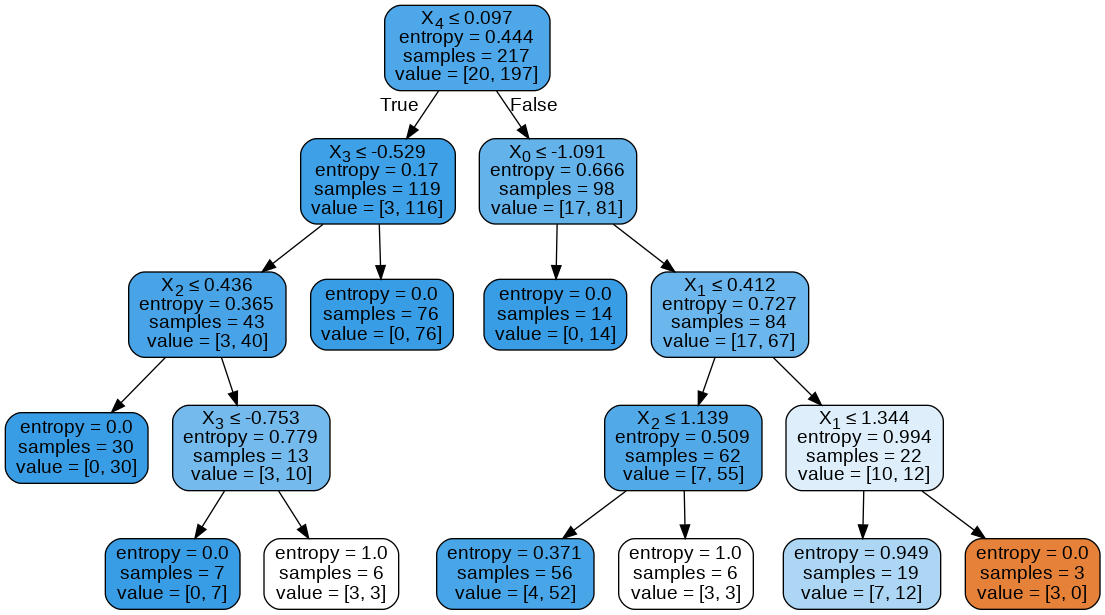

In [ ]:
#visulising the Decsion Tree

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(VoteTree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#SVM model 

from sklearn import svm

clf = svm.SVC(kernel='sigmoid') # Linear Kernel
clf.fit(X_train, y_train)

SVM_pred = clf.predict(X_test)

In [ ]:
#Evaluation of SVM model
print(confusion_matrix(y_test, SVM_pred))
print(classification_report(y_test, SVM_pred))

[[ 1 12]
 [ 0 60]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.83      1.00      0.91        60

    accuracy                           0.84        73
   macro avg       0.92      0.54      0.53        73
weighted avg       0.86      0.84      0.77        73



In [ ]:
# log reg accuracy with train/test split 0.82 
# knn accuracy with train/test split 0.85
# Decision Trees accuracy with train/test split 0.81
# SVM accuracy with train/test split 0.84

The four models used in for this classification machine learning problem are logistic regression, Ks nearest neighbour, Decision Trees and Support vector machines. I have selected these four models to solve this specific problem as they are all useful for solving binary classification problems to a high degree of accuracy. To determine which algorithm is best suited to solve this problem the model creation methods have all been trained and tested on the data, with their accuracy, precision, recall and F1 scores recorded. The model with the highest accuracy figure is K nearest neighbour model, recording an accuracy of 85%. Therefore, in terms of accuracy, this would be the best model to use for this particular learning problem. A reason for this could be the KNN model has the most optimised parameters, with the K value being optimised to the one that best suits the data. Another reason why KNN is the best model for this problem is it has the highest F1 scores out of all the other models for both classes. A prominent issue with the data is the heavy bias of one particular class, the 0 class (rebel votes) in comparison to the 1 class (votes for the Brexit deal). This is a problem when producing a machine learning solution to this classification problem as it will produce rather low precision and recall values for one particular class, suggesting that the model may not be so accurate for predicting one particular class on unseen data due to the insufficient presence of it within the training data. Another problem with solving this classification problem using machine learning algorithms is the dataset is rather small for a high-quality model to be produced. This is an issue as a small dataset means limited training and testing data, which means this model may be poorly optimised for dealing with a larger quantity of unseen data as the model has not been trained well enough to deal with all the nuances in the feature sets. A clear way to rectify this issue would be to increase the amount of data used in generating the machine learning algorithms, however in the context of this specific social data science project, that would be hard to achieve given the limited nature of the possible data that can be obtained being bound by a limited number of Conservative MPs.